#  Titanic Project

In [182]:
# import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score

In [183]:
# read csv file and convert into dataframe
data = pd.read_csv('titanic_train.csv')
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ****** Observations*******
Firstly, we explore the Titanic dataset and explore about the people who suvived and those who did not

Unnamed: 0 - no need of this unnamed column so we can drop from the dataset

PassengerID - it is used serial nos of passengers

Survived- having two type of values 0 and 1. 0 for Died and 1 for Survived

Pclass - Pclass is having three types of classes. 1stclass,2ndclass,3rdclass

Name - real name of passengers

Sex - gender of the passenger male or female

Age - age of passengers and some passangers age are missing

sibSp-  no. of siblings or spouses

Parch - no of childerens or parents

Ticket - ticket no of passengers

Fare-  fare of ticket
 
cabin - column cabin has more missing values

Embarked - we have three values S,C and Q Embarked is port/station

These are the features of this dataset


In [184]:
# let's check the shape of the dataset
data.shape

(891, 13)

### we have 891 rows and 13 columns in  this dataset

In [185]:
# summery about all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


### there is null values present in age ,cabin and embarked column,we will use imputing techniques to treat with NAN

In [186]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [187]:
# we will use replace method to manipulate the text
data['Sex'] = data['Sex'].replace({'male':1,'female':0})
data['Embarked'] = data['Embarked'].replace({'S':1,'C':2,'Q':3})


In [188]:
# let's drop the unnecessary columns from dataset,machine is not understand the text dataso we can drop the name,ticket and cabin columns
data.drop(columns=['Unnamed: 0','Name','Ticket','Cabin'],axis = 1,inplace = True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1.0
1,2,1,1,0,38.0,1,0,71.2833,2.0
2,3,1,3,0,26.0,0,0,7.9250,1.0
3,4,1,1,0,35.0,1,0,53.1000,1.0
4,5,0,3,1,35.0,0,0,8.0500,1.0


###  after manipulation data looks good

In [189]:
# understanding data at high level, we check stats of dataset
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.362205
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


### Observations====

1-Age= Max value of Age is indicating the presence of outliers.

2-sex= Mean & STD are close to each others

3-SibSp= data is very confusing

4-Parch= data is very confusing

5-Fare = Max value of Fare is  indicating the presence of outliers.

6-Embarked = Measure of central Tendency and Dispersion is looking satisfactory,Min and Max are also satisfactory.

7- Pclass = q2,q3 and max values are same in pclass

###  Treating with null values

In [190]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [191]:
# no need of Parch column
data.drop('Parch',axis = 1,inplace = True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,1,22.0,1,7.2500,1.0
1,2,1,1,0,38.0,1,71.2833,2.0
2,3,1,3,0,26.0,0,7.9250,1.0
3,4,1,1,0,35.0,1,53.1000,1.0
4,5,0,3,1,35.0,0,8.0500,1.0


In [192]:
data.drop('Fare',axis = 1,inplace = True)

In [193]:
# let's check the null values
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Embarked       0
dtype: int64

### now the data looks good ,there is no missing value present in dataset

##  Target variable

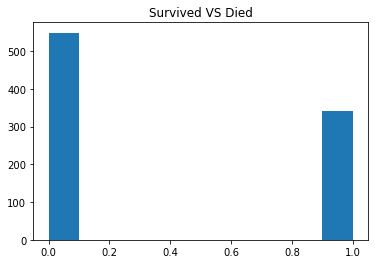

In [194]:
# let's visualize the target how many passengers are survived or died
data['Survived'].hist(grid = False)
plt.title('Survived VS Died')
plt.show()

In [195]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

###  there is no sign of imbalancing ,there are 549 passengers are Died and 342 passengers are Survived

## Feature vs label

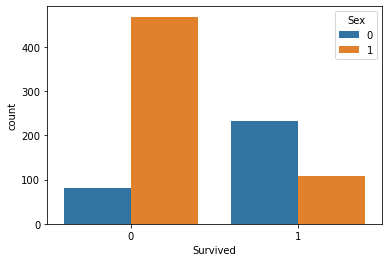

In [196]:
# let's visualize the data how many male or female survived by using count plot
sns.countplot(x = 'Survived', hue = 'Sex',data = data)
plt.show()

### as compared to female , males are more who did not survived

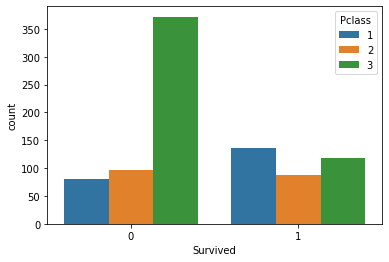

In [197]:
# let's visualize the classes of passengers
sns.countplot(x = 'Survived', hue = 'Pclass',data = data)
plt.show()

### as compared to other classes,3rdclass passengers are more who did not survived

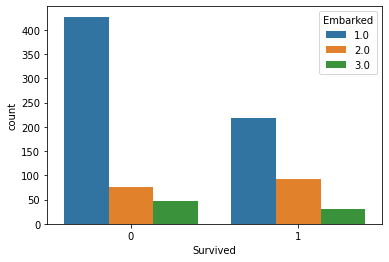

In [198]:
# let's visualize relationship between Survived and Embarked
sns.countplot(x = 'Survived', hue = 'Embarked',data = data)
plt.show()

### As compared to other ports, southern port of passengers are more who did not survived

### According to my Pre observation on data i suspected outliers in Age and SibSp columns now,  i am checking the outliers by plotting BOX PLOT 

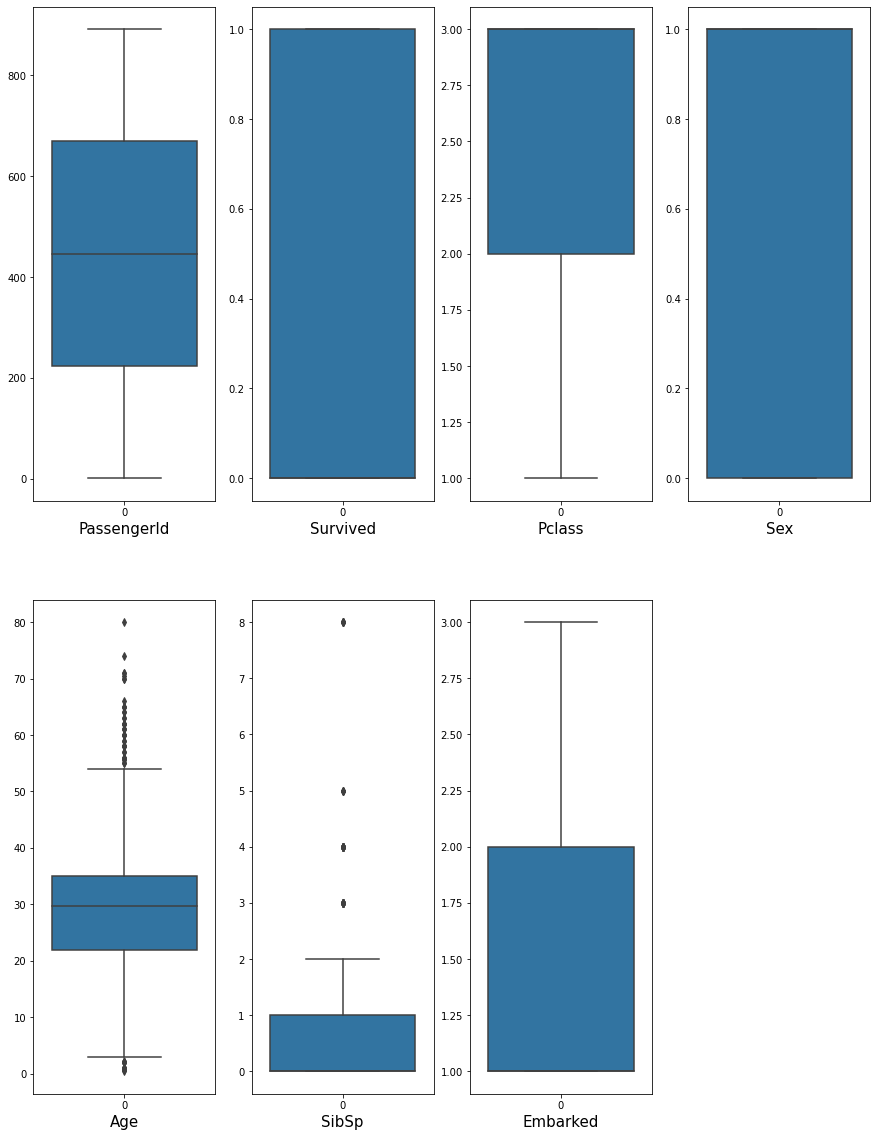

In [199]:
# let's visualize the outliers using boxplot
plt.figure(figsize = (15,20))
pn = 1
for col in data:
    if pn <= 8:
        plt.subplot(2,4,pn)
        ax=sns.boxplot(data = data[col])
        plt.xlabel(col,fontsize= 15)
    pn += 1
plt.show()    

### As expected age,sibsp are showing outliers ,Lets treat with outliers first..............

In [200]:
# Use the quantile techniques
#find the IQR(Inter Quantile Range) to identify the outliers
# 1st Quantile
q1 = data.quantile(0.25)
# 3rd Quantile
q3 = data.quantile(0.75)
# IQR
iqr = q3 - q1
iqr

PassengerId    445.0
Survived         1.0
Pclass           1.0
Sex              1.0
Age             13.0
SibSp            1.0
Embarked         1.0
dtype: float64

In [201]:
data.shape

(891, 7)

In [202]:
# remove the outliers from higher side of age
age = (q3.Age + (1.5*iqr.Age))
age
# check the index which have higher values
index = np.where(data['Age']>age)
index
# drop the index which we find in the above cell
data = data.drop(data.index[index])
data.shape
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,1,0,3,1,22.000000,1,1.0
1,1,2,1,1,0,38.000000,1,2.0
2,2,3,1,3,0,26.000000,0,1.0
3,3,4,1,1,0,35.000000,1,1.0
4,4,5,0,3,1,35.000000,0,1.0
...,...,...,...,...,...,...,...,...
844,886,887,0,2,1,27.000000,0,1.0
845,887,888,1,1,0,19.000000,0,1.0
846,888,889,0,3,0,29.699118,1,1.0
847,889,890,1,1,1,26.000000,0,2.0


In [203]:
# remove the outliers from lower side of age
age = (q1.Age - (1.5*iqr.Age))
age
# check the index which have higher values
index = np.where(data['Age']<age)
index
# drop the index which we find in the above cell
data = data.drop(data.index[index])
data.shape
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,1,0,3,1,22.000000,1,1.0
1,1,2,1,1,0,38.000000,1,2.0
2,2,3,1,3,0,26.000000,0,1.0
3,3,4,1,1,0,35.000000,1,1.0
4,4,5,0,3,1,35.000000,0,1.0
...,...,...,...,...,...,...,...,...
820,886,887,0,2,1,27.000000,0,1.0
821,887,888,1,1,0,19.000000,0,1.0
822,888,889,0,3,0,29.699118,1,1.0
823,889,890,1,1,1,26.000000,0,2.0


In [204]:
data.shape

(825, 7)

In [205]:
# remove the outliers from higher side of 
sibsp= (q3.SibSp + (1.5*iqr.SibSp))
sibsp
# check the index which have higher values
index = np.where(data['SibSp']>sibsp)
index
# drop the index which we find in the above cell
data = data.drop(data.index[index])
data.shape
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,1,0,3,1,22.000000,1,1.0
1,1,2,1,1,0,38.000000,1,2.0
2,2,3,1,3,0,26.000000,0,1.0
3,3,4,1,1,0,35.000000,1,1.0
4,4,5,0,3,1,35.000000,0,1.0
...,...,...,...,...,...,...,...,...
781,886,887,0,2,1,27.000000,0,1.0
782,887,888,1,1,0,19.000000,0,1.0
783,888,889,0,3,0,29.699118,1,1.0
784,889,890,1,1,1,26.000000,0,2.0


## let's check the outliers are remove or not

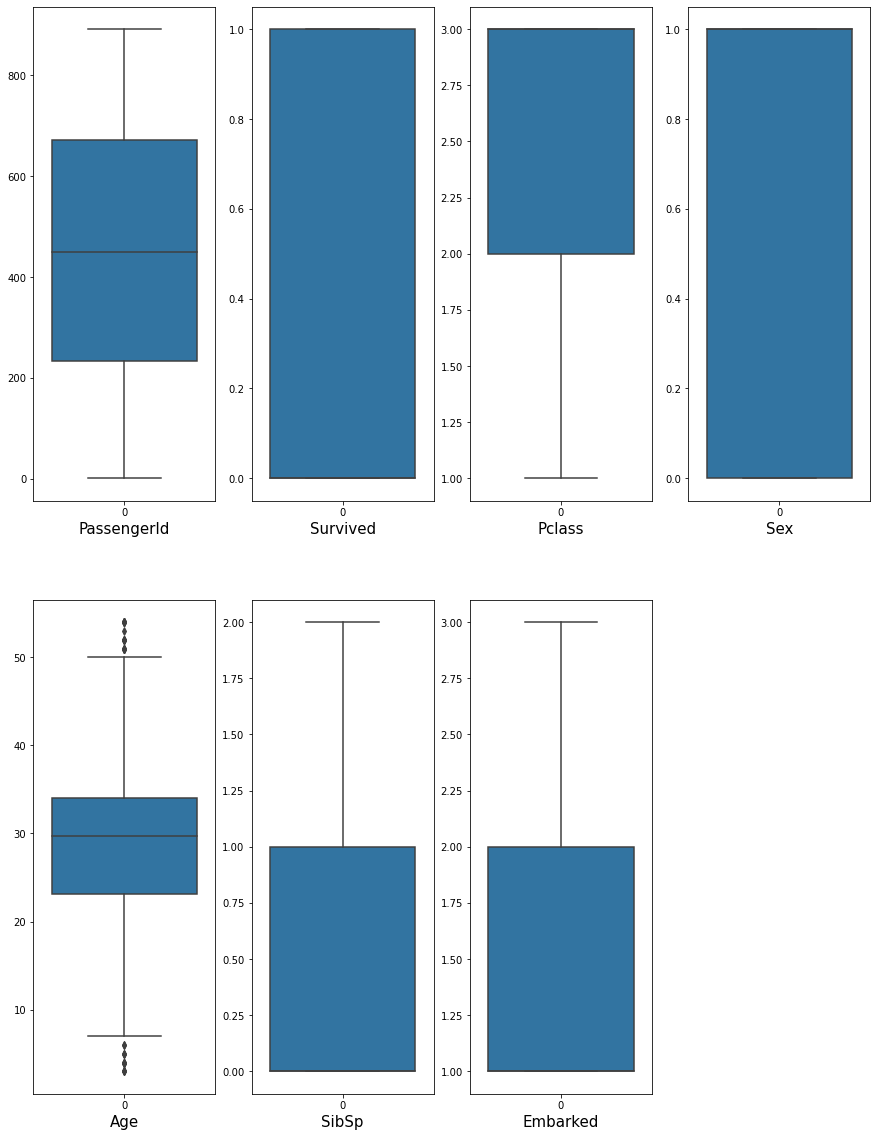

In [206]:

plt.figure(figsize = (15,20))
pn = 1
for col in data:
    if pn <= 8:
        plt.subplot(2,4,pn)
        ax=sns.boxplot(data = data[col])
        plt.xlabel(col,fontsize= 15)
    pn += 1
plt.show()    

### outliers are removed from age and SibSp column

In [207]:
data.shape

(786, 7)

In [208]:
#Lets seprate Label and Features for checking if all features and contributing to Label
x = data.drop(columns = ['Survived'])
x.head()
              

,PassengerId,Pclass,Sex,Age,SibSp,Embarked
0,1,3,1,22.0,1,1.0
1,2,1,0,38.0,1,2.0
2,3,3,0,26.0,0,1.0
3,4,1,0,35.0,1,1.0
4,5,3,1,35.0,0,1.0


In [209]:
y = data['Survived']


## Lets check Multi-Collinearity by plotting Heat map

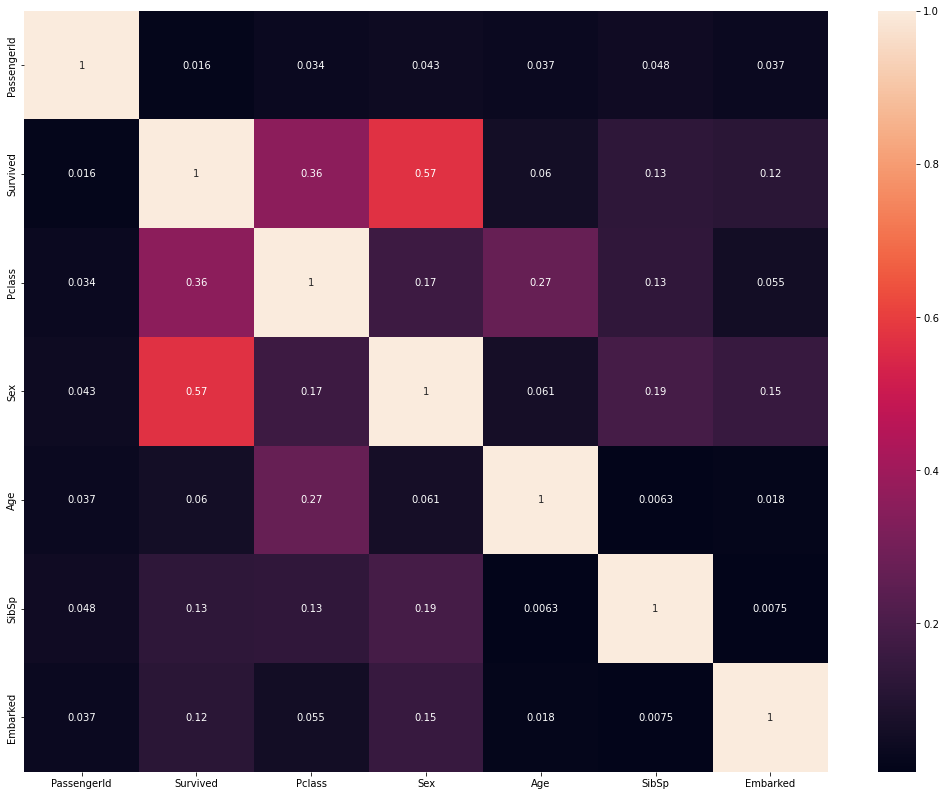

In [210]:
df_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True)
plt.show()

### NO Multi-collinearity problem has been visualized


##  Data Standardization and Normalization


In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
# let's standardize the data using standard scaler
# data scaling formula z = (x-mean)/std
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.76165776,  0.8238864 ,  0.73359421, -0.76319069,  1.305055  ,
        -0.57905514],
       [-1.75773952, -1.59243714, -1.36315143,  0.87075529,  1.305055  ,
         0.97963437],
       [-1.75382128,  0.8238864 , -1.36315143, -0.3547042 , -0.59101382,
        -0.57905514],
       ...,
       [ 1.71773957,  0.8238864 , -1.36315143,  0.0230557 ,  1.305055  ,
        -0.57905514],
       [ 1.72165781, -1.59243714,  0.73359421, -0.3547042 , -0.59101382,
         0.97963437],
       [ 1.72557605,  0.8238864 ,  0.73359421,  0.25802554, -0.59101382,
         2.53832389]])

## Best Random State

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [214]:
# maximum accuracy
max_accu = 0
# best random state value for which max accuracy is achived
max_rs = 0
for i in range(1,786):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.20,random_state = i)
    ada =AdaBoostClassifier()
    ada.fit(x_train,y_train)
    y_pred = ada.predict(x_train)
    score1 = accuracy_score(y_train,y_pred)
    pred = ada.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('training score',score1,'testing score',score,'random state',i)
    if (score and score1) > max_accu:
        max_accu = score
        max_rs = i
        print('Training score',score1,'testing score',score,'random state',i)
    



training score 0.8232484076433121 testing score 0.8037974683544303 random state 1
Training score 0.8232484076433121 testing score 0.8037974683544303 random state 1
training score 0.8375796178343949 testing score 0.7151898734177216 random state 2
Training score 0.8375796178343949 testing score 0.7151898734177216 random state 2
training score 0.8232484076433121 testing score 0.7784810126582279 random state 3
Training score 0.8232484076433121 testing score 0.7784810126582279 random state 3
training score 0.8375796178343949 testing score 0.7341772151898734 random state 4
Training score 0.8375796178343949 testing score 0.7341772151898734 random state 4
training score 0.8232484076433121 testing score 0.759493670886076 random state 5
Training score 0.8232484076433121 testing score 0.759493670886076 random state 5
training score 0.8328025477707006 testing score 0.7468354430379747 random state 6
Training score 0.8328025477707006 testing score 0.7468354430379747 random state 6
training score 0.8

In [215]:
print('Best accuracy is',max_accu,'on random state',max_rs)

Best accuracy is 0.8607594936708861 on random state 80


## Train Test Split

In [251]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 107)


## Model Building using Logistic regression

In [217]:
# creating object for LogisticRegression
lr = LogisticRegression()
# model training
lr.fit(x_train,y_train)
# predict the training score
y_pred = lr.predict(x_train)
print('Training score',accuracy_score(y_train,y_pred))
pred = lr.predict(x_test)
print('Testing score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 0.804140127388535
Testing score 0.8037974683544303
[[81 13]
 [18 46]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        94
           1       0.78      0.72      0.75        64

    accuracy                           0.80       158
   macro avg       0.80      0.79      0.79       158
weighted avg       0.80      0.80      0.80       158



### After setting the random state = 107 , We got the accuracy score is 80%

## Model Building using KNN

In [219]:
# creating object for KNeighbors
knn = KNeighborsClassifier()
# model training
knn.fit(x_train,y_train)
# predict the training score
y_pred = knn.predict(x_train)
print('Training score',accuracy_score(y_train,y_pred))
pred = knn.predict(x_test)
print('Testing score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 0.6831210191082803
Testing score 0.6329113924050633
[[75 20]
 [38 25]]
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        95
           1       0.56      0.40      0.46        63

    accuracy                           0.63       158
   macro avg       0.61      0.59      0.59       158
weighted avg       0.62      0.63      0.62       158



### After setting the random state = 67 , We got the accuracy score is 63% i am not satisfied with this score we work on  other models

## Model Building using Random Forest


In [221]:
# creating object for RandomForest
rf = RandomForestClassifier()
# model training
rf.fit(x_train,y_train)
# predict the training score
y_pred = rf.predict(x_train)
print('Training score',accuracy_score(y_train,y_pred))
pred = rf.predict(x_test)
print('Testing score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 1.0
Testing score 0.879746835443038
[[89  6]
 [13 50]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        95
           1       0.89      0.79      0.84        63

    accuracy                           0.88       158
   macro avg       0.88      0.87      0.87       158
weighted avg       0.88      0.88      0.88       158



### After setting the random state = 596 , We got the accuracy score is 87% score is good but difference between training and testing score is more, confusion matrix of random forest is better than logistic regression

## Model Building using Decision tree

In [225]:
# creating object for DecisionTree
dt = DecisionTreeClassifier()
# model training
dt.fit(x_train,y_train)
# predict the training score
y_pred = dt.predict(x_train)
print('Training score',accuracy_score(y_train,y_pred))
pred = dt.predict(x_test)
print('Testing score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 1.0
Testing score 0.8291139240506329
[[91 15]
 [12 40]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       106
           1       0.73      0.77      0.75        52

    accuracy                           0.83       158
   macro avg       0.81      0.81      0.81       158
weighted avg       0.83      0.83      0.83       158



 ### After setting the random state = 364 , We got the accuracy score is 82%

## Model Building using ada boost


In [227]:
# creating object for AdaBOOst
ada = AdaBoostClassifier()
# model training
ada.fit(x_train,y_train)
# predict the training score
y_pred = ada.predict(x_train)
print('Training score',accuracy_score(y_train,y_pred))
pred = ada.predict(x_test)
print('Testing score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 0.8296178343949044
Testing score 0.8227848101265823
[[85 13]
 [15 45]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        98
           1       0.78      0.75      0.76        60

    accuracy                           0.82       158
   macro avg       0.81      0.81      0.81       158
weighted avg       0.82      0.82      0.82       158



### After setting the random state = 192 , We got the accuracy score is 82%,i am satisfied with this score

##  Cross validation for logistic regression

In [228]:
from sklearn.model_selection import cross_val_score

In [229]:
cr1 = cross_val_score(lr,x,y,cv = 5)
print("Cross validation score of LogisticRegression model",cr1.mean())

Cross validation score of LogisticRegression model 0.8129807304684352


In [230]:
cr1

array([0.81012658, 0.84076433, 0.78343949, 0.8089172 , 0.82165605])

### Difference between model accuracy and cross validation accuracy score is 1

##  Cross validation for KNN

In [231]:
cr2 = cross_val_score(knn,x,y,cv = 5)
print("Cross validation score of KNN",cr2.mean())

Cross validation score of KNN 0.49094573893412885


In [232]:
cr2

array([0.60759494, 0.40764331, 0.41401274, 0.42038217, 0.60509554])

### Difference between model accuracy and cross validation accuracy score is big

##  Cross validation for Decision Tree

In [233]:
cr3 = cross_val_score(dt,x,y,cv = 5)
print("Cross validation score of Decision Tree model",cr3.mean())

Cross validation score of Decision Tree model 0.7621865677658631


In [234]:
cr3

array([0.6835443 , 0.78980892, 0.79617834, 0.75159236, 0.78980892])

### Difference between model accuracy and cross validation accuracy score is 8

## Cross validation for Random Forest

In [235]:
cr4 = cross_val_score(rf,x,y,cv = 5)
print("Cross validation score of Random Forest model",cr4.mean())

Cross validation score of Random Forest model 0.7914939933886963


In [236]:
cr4

array([0.67721519, 0.81528662, 0.8089172 , 0.82802548, 0.82802548])

### Difference between model accuracy and cross validation accuracy score is 7

## Cross validation for ADA BOOST


In [237]:
cr5 = cross_val_score(ada,x,y,cv = 5)
print("Cross validation score of ADA BOOST",cr5.mean())

Cross validation score of ADA BOOST 0.725300330565186


In [238]:
cr5

array([0.63924051, 0.73248408, 0.8089172 , 0.80254777, 0.6433121 ])

### Difference between model accuracy and cross validation accuracy score is 10

## Hyperparameter Tuning

In [239]:
# Hyperparameter tuning using Random Forest
params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

In [240]:
grd = GridSearchCV(rf,param_grid = params)

In [241]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [242]:
rf = grd.best_estimator_

In [243]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=15)

In [244]:
pred = rf.predict(x_test)
accuracy_score(y_test,pred)

0.8164556962025317

## ROC AUC Curve

In [245]:
from sklearn.metrics import plot_roc_curve

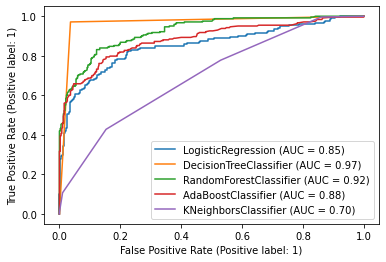

In [253]:
disp = plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(dt,x_train,y_train,ax = disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax = disp.ax_)
plot_roc_curve(ada,x_train,y_train,ax = disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax = disp.ax_)
plt.legend(prop={'size':10},loc = 'lower right')
plt.show()

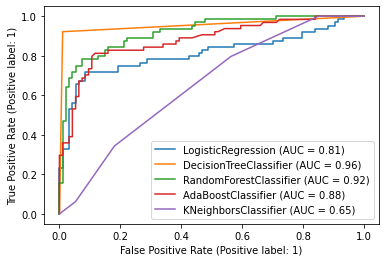

In [254]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax = disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax = disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax = disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax = disp.ax_)
plt.legend(prop={'size':10},loc = 'lower right')
plt.show()

##  Save the final model

In [255]:
# as per my observation Random forest is best for this dataset 
import pickle

In [256]:
pickle.dump(rf,open('Titanic_model','wb'))

In [257]:
import joblib

In [258]:
joblib.dump(rf,'Titanic Model.pkl')

['Titanic Model.pkl']